Importing dataset and libraries, then reducing dataset using stratified sampling based on target feature

In [47]:
import pandas as pd

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

EDA ON ORIGINAL DATASET

Categorical features frequencies

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

def plot_categorical_bar_distribution():
    categorical_df = df[categorical_features]
    for column in categorical_features:
        sns.catplot(x=column, kind="count", data=categorical_df, height=6, aspect=1)
    plt.figure(figsize=(8, 8))
    stroke_counts = df['stroke'].value_counts()
    labels = stroke_counts.index
    sizes = stroke_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.show()
        
                
plot_categorical_bar_distribution()


Numerical features distribution

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['age', 'avg_glucose_level', 'bmi']

def plot_numerical_features():
    numerical_df = df[numerical_features]
    fig, axs = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(15, 6*len(numerical_features)))
    
    for i, column in enumerate(numerical_features):
        sns.histplot(data=numerical_df, x=column, kde=True, ax=axs[i][0])

        sns.boxplot(data=numerical_df, x=column, ax=axs[i][1])
        
        axs[i][0].set_title(f'{column} Distribution')
        axs[i][1].set_title(f'{column} Boxplot')
        
    plt.tight_layout()
    plt.show()

plot_numerical_features()


Correlation matrix

KeyError: "['stroke'] not found in axis"

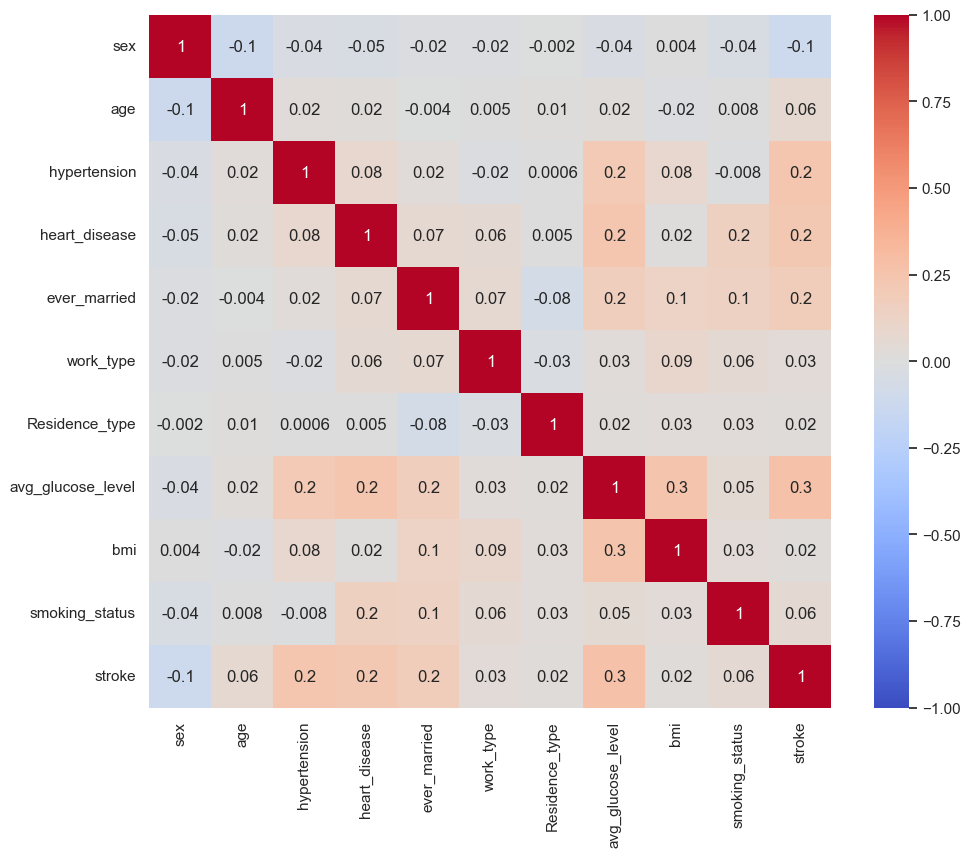

In [48]:
sns.set(rc = {'figure.figsize':(11,9)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

df_without_target = df.drop('stroke')
df_without_target.corrwith(df.stroke).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Stroke",color="orange");